# Load Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt

import os
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE

In [3]:
data_attributes = pd.read_csv(os.path.join("data", "Data+Attribute+Description.csv"))
data_attributes

,Attribute,Attribute Description
0,id,Uniques identity number to identify each uniqu...
1,brand,Name of the brand of the product to which user...
2,categories,Category of the product like household essenti...
3,manufacturer,Name of the manufacturer of the product
4,name,Name of the product to which user has added re...
5,reviews_date,Date on which the review has been added by the...
6,reviews_didPurchase,Whether a particular user has purchased the pr...
7,reviews_doRecommend,Whether a particular user has recommended the ...
8,reviews_rating,Rating given by the user to a particular product
9,reviews_text,Review given by the user to a particular product


In [4]:
data = pd.read_csv(os.path.join("data", "sample30.csv"))
print(data.shape)

data.head()

(30000, 15)


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [5]:
data.sample(10)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
17524,AVpfazX31cnluZ0-kbdl,Just For Men,"Personal Care,Hair Care,Hair Color And Bleachi...",Combe Incorporated,Just For Men Touch Of Gray Gray Hair Treatment...,2013-02-21T00:00:00.000Z,False,True,5,I have tried other hair coloring and touch of ...,the best hair coloring l have ever used,NaN,NaN,maddog,Positive
7693,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-24T00:00:00.000Z,False,True,4,This is wonderful to use everywhere. I use the...,This is an all around great product,NaN,NaN,colliehicksgirl,Positive
27676,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-12-05T00:00:00.000Z,NaN,True,5,This was a great movie. It's a must own movie ...,Great movie,NaN,NaN,kevman,Positive
25361,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2014-10-17T00:00:00.000Z,NaN,True,5,This movie surpasses all of the other Godzilla...,Love this movie,NaN,NaN,karenmchavez,Positive
7982,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-27T01:51:11.000Z,NaN,True,5,I always know my kitchen is clean after I have...,Great Product,Owensboro,NaN,tucker65,Positive
25931,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2014-12-26T00:00:00.000Z,NaN,True,5,Great movie. Worth the buy. Especially on Blu ...,Great movie,NaN,NaN,jordanjj1031,Positive
10287,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-04T00:00:00.000Z,False,True,5,Clorox clean ups are my go to for the germiest...,Gotta have them!,NaN,NaN,shelleykc,Positive
3027,AVpe59io1cnluZ0-ZgDU,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & T...",Universal,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,2016-08-29T00:00:00.000Z,NaN,True,5,I just love this series wished they would of m...,Fun Family Series,NaN,NaN,lauralee,Positive
22416,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy,"Personal Care,Hair Care,Shampoo,Featured Brand...",Clear,Clear Scalp & Hair Therapy Total Care Nourishi...,2016-11-20T00:00:00.000Z,False,False,1,I wanted to try the new formula before I took ...,Hair feels like straw! Bring original back!,NaN,NaN,wren113,Positive
3364,AVpe5s3RLJeJML43x4eA,Pantene,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",Pantene Pro-V Hair Care,Pantene Pro-V Expert Collection Age Defy Condi...,2016-04-09T00:00:00.000Z,False,NaN,4,This product left my hair a little frizzy but ...,great hair day,NaN,NaN,pegawatt,Positive


# Exploratory data analysis

In [6]:
profile = ProfileReport(data, title="Profiling Report")

In [7]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning and Preprocessing

In [8]:
# Remove the missing row of user_sentiment
data = data[~data.user_sentiment.isnull()]

In [9]:
# map the categorical user_sentiment to numerical 1 or 0 for modelling
data['user_sentiment'] = data['user_sentiment'].map({'Positive':1,'Negative':0})

In [10]:
# check ratio of positive and negative reviews

data.user_sentiment.value_counts(normalize=True)

1    0.887763
0    0.112237
Name: user_sentiment, dtype: float64

Check how reviews and ratings correlate

In [11]:
# fill review title with empty text where it's nil

data['reviews_title'] = data['reviews_title'].fillna('')

In [12]:
# Checking for missing values in data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29999 non-null  object
 1   brand                 29999 non-null  object
 2   categories            29999 non-null  object
 3   manufacturer          29858 non-null  object
 4   name                  29999 non-null  object
 5   reviews_date          29953 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27429 non-null  object
 8   reviews_rating        29999 non-null  int64 
 9   reviews_text          29999 non-null  object
 10  reviews_title         29999 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  169 non-null    object
 13  reviews_username      29936 non-null  object
 14  user_sentiment        29999 non-null  int64 
dtypes: int64(2), object(13)
memory usage

In [13]:
# dropping columns with high missing values

data.drop(['reviews_didPurchase', 'reviews_userCity', 'reviews_userProvince'], axis=1, inplace=True)
data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,1
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,Good flavor.,Good,dorothy w,1
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,0
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,0


# Text processing and feature extraction

In [14]:
# copy data to a new df for sentiment analysis

sentiment_data = data[['id','name', 'reviews_title', 'reviews_text', 'user_sentiment']].copy()
sentiment_data.head()

,id,name,reviews_title,reviews_text,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome,i love this album. it's very good. more to the...,1
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good,Good flavor. This review was collected as part...,1
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good,Good flavor.,1
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Disappointed,I read through the reviews on here before look...,0
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation,My husband bought this gel for us. The gel cau...,0


In [15]:
# Concatenating review title and review text which would be used for sentiment analysis

sentiment_data['reviews_title_text']= data['reviews_title'] +" "+ data['reviews_text']
sentiment_data.head()

,id,name,reviews_title,reviews_text,user_sentiment,reviews_title_text
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome,i love this album. it's very good. more to the...,1,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good,Good flavor. This review was collected as part...,1,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good,Good flavor.,1,Good Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Disappointed,I read through the reviews on here before look...,0,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation,My husband bought this gel for us. The gel cau...,0,Irritation My husband bought this gel for us. ...


In [16]:
# dropping reviews_title and reviews_text

sentiment_data.drop(['reviews_title', 'reviews_text'], axis=1, inplace=True)
sentiment_data.head()

,id,name,user_sentiment,reviews_title_text
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),1,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,1,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,1,Good Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,0,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,0,Irritation My husband bought this gel for us. ...


In [17]:
# Function that returns the wordnet object value corresponding to the POS tag

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Function for cleaning the text

def clean_text(text):
    # lower text
    text = text.lower()

    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    return(text)

In [18]:
# clean text data
sentiment_data["reviews_clean"] = sentiment_data.apply(lambda x: clean_text(x['reviews_title_text']),axis=1)

In [19]:
sentiment_data.head()

,id,name,user_sentiment,reviews_title_text,reviews_clean
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),1,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,1,Good Good flavor. This review was collected as...,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,1,Good Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,0,Disappointed I read through the reviews on her...,disappoint read review look buy one couple lub...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,0,Irritation My husband bought this gel for us. ...,irritation husband buy gel gel caused irritati...


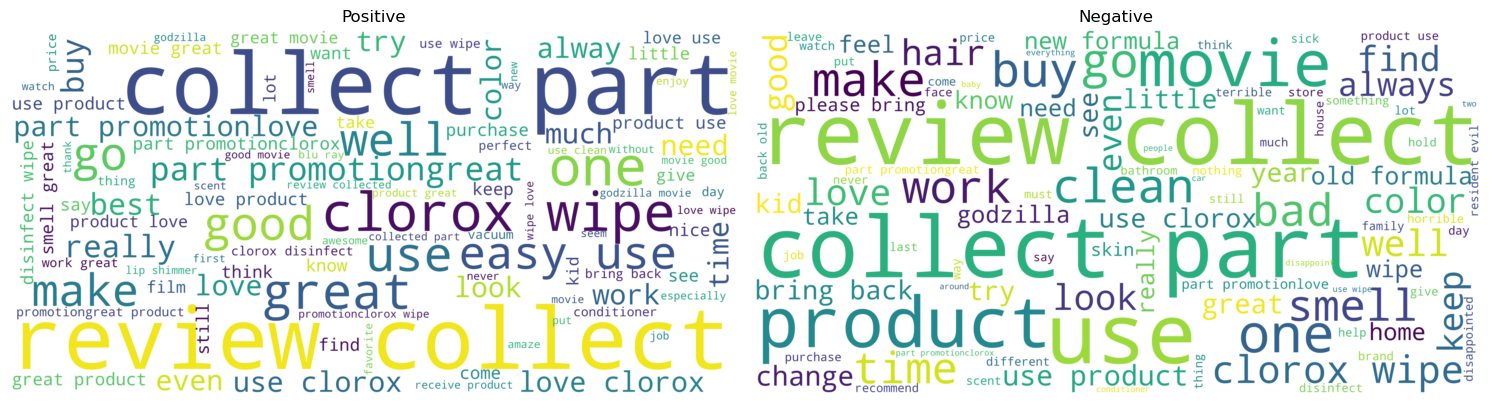

In [20]:
# Word clouds for postive and negative reviews 
%matplotlib inline

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title('Positive')

positive_reviews = sentiment_data.loc[sentiment_data.user_sentiment == 1, ['reviews_clean']]
word_cloud_text = ''.join(positive_reviews['reviews_clean'])

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color='white',
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.imshow(wordcloud, interpolation='bilinear')  # to make the displayed image appear more smoothly
plt.axis('off')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.title('Negative')

negative_reviews = sentiment_data.loc[sentiment_data.user_sentiment == 0, ['reviews_clean']]
word_cloud_text = ''.join(negative_reviews['reviews_clean'])

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color='white',
    scale=10,
    width=800,
    height=400,
).generate(word_cloud_text)

plt.imshow(wordcloud, interpolation='bilinear')  # to make the displayed image appear more smoothly
plt.axis('off')
plt.tight_layout()

- Some of the words associated with Positive reviews are - 'great', 'promotion', 'good', 'love', 'use'
- Some of the words associated with Negative reviews are - 'bad', 'horrible', 'smell', 'little', 'nothing'

In [21]:
# Converting the clean & processed review text to features using Tf-idf

tfidf_vectorizer = TfidfVectorizer(tokenizer= word_tokenize,
                               stop_words=stopwords.words('english'),
                               ngram_range=(1,1)
                              )

tfidf_data = tfidf_vectorizer.fit_transform(sentiment_data["reviews_clean"])

In [22]:
# Saving the vectorizer so that it can be used later while deploying the model

filename = "Tfidf_vectorizer.pkl"
with open(filename, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

# Load from file
with open(filename, 'rb') as file:
    pickled_tfidf_vectorizer = pickle.load(file)

In [23]:
# Splitting the data into train and test

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            sentiment_data['user_sentiment'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [24]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(y_train_tfidf.shape)
print(y_test_tfidf.shape)

(23999, 17365)
(6000, 17365)
(23999,)
(6000,)


# Model Building

## Logistic Regression

In [25]:
lr = LogisticRegression()
  
lr.fit(X_train_tfidf, y_train_tfidf.ravel())
  
predictions = lr.predict(X_test_tfidf)
  
conf_mat = confusion_matrix(y_test_tfidf, predictions)
print(conf_mat)

print(classification_report(y_test_tfidf, predictions))
print("Accuracy : ",accuracy_score(y_test_tfidf, predictions))
print("F1 score: ",f1_score(y_test_tfidf, predictions))
print("Recall: ",recall_score(y_test_tfidf, predictions))
print("Precision: ",precision_score(y_test_tfidf, predictions))

[[ 158  497]
 [  48 5297]]
              precision    recall  f1-score   support

           0       0.77      0.24      0.37       655
           1       0.91      0.99      0.95      5345

    accuracy                           0.91      6000
   macro avg       0.84      0.62      0.66      6000
weighted avg       0.90      0.91      0.89      6000

Accuracy :  0.9091666666666667
F1 score:  0.951072807253793
Recall:  0.9910196445275958
Precision:  0.9142216085605799


The Accuracy and precission is very good but the model doesn't perform well on negative reviews. We need to handle the class imbalance

Using SMOTE for handling class imbalance

In [26]:
print("label '1': {}".format(sum(y_train_tfidf == 1)))
print("label '0': {} \n".format(sum(y_train_tfidf == 0)))

oversample = SMOTE(random_state = 100)
X_train_tfidf_res, y_train_tfidf_res = oversample.fit_resample(X_train_tfidf, y_train_tfidf.ravel())

print ('-----------------After Sampling-----------------')
print('train_X shape: {}'.format(X_train_tfidf_res.shape))
print('train_y shape: {} \n'.format(y_train_tfidf_res.shape))

print("label '1': {}".format(sum(y_train_tfidf_res == 1)))
print("label '0': {}".format(sum(y_train_tfidf_res == 0)))

label '1': 21287
label '0': 2712 

-----------------After Sampling-----------------
train_X shape: (42574, 17365)
train_y shape: (42574,) 

label '1': 21287
label '0': 21287


In [27]:
# Training after handling imbalance

lr1 = LogisticRegression(solver='lbfgs', max_iter=1000)
lr1.fit(X_train_tfidf_res, y_train_tfidf_res.ravel())
predictions1 = lr1.predict(X_test_tfidf)

confusion = confusion_matrix(y_test_tfidf, predictions1)
print(confusion)

print(classification_report(y_test_tfidf, predictions1))
print("Accuracy : ",accuracy_score(y_test_tfidf, predictions1))
print("F1 score: ",f1_score(y_test_tfidf, predictions1))
print("Recall: ",recall_score(y_test_tfidf, predictions1))
print("Precision: ",precision_score(y_test_tfidf, predictions1))

[[ 529  126]
 [ 733 4612]]
              precision    recall  f1-score   support

           0       0.42      0.81      0.55       655
           1       0.97      0.86      0.91      5345

    accuracy                           0.86      6000
   macro avg       0.70      0.84      0.73      6000
weighted avg       0.91      0.86      0.88      6000

Accuracy :  0.8568333333333333
F1 score:  0.9148071010611922
Recall:  0.8628624883068288
Precision:  0.9734065006331786


- Recall is decent for both the classes
- Precision is excellent for positive reviews and bad for negative
- Since, for our application we need to find out the products with positive reviews. This model is good enough, let's look at some other models

## Random Forest

In [28]:
rf = RandomForestClassifier(n_estimators=300)

rf.fit(X_train_tfidf_res, y_train_tfidf_res)

y_pred_rf = rf.predict(X_test_tfidf)

conf_mat_rf = confusion_matrix(y_test_tfidf, y_pred_rf)
print(conf_mat_rf)

print(classification_report(y_test_tfidf, y_pred_rf))
print("Accuracy : ",accuracy_score(y_test_tfidf, y_pred_rf))
print("F1 score: ",f1_score(y_test_tfidf, y_pred_rf))
print("Recall: ",recall_score(y_test_tfidf, y_pred_rf))
print("Precision: ",precision_score(y_test_tfidf, y_pred_rf))

[[ 246  409]
 [ 173 5172]]
              precision    recall  f1-score   support

           0       0.59      0.38      0.46       655
           1       0.93      0.97      0.95      5345

    accuracy                           0.90      6000
   macro avg       0.76      0.67      0.70      6000
weighted avg       0.89      0.90      0.89      6000

Accuracy :  0.903
F1 score:  0.9467325645249863
Recall:  0.9676333021515435
Precision:  0.9267156423580004


Accuracy of the model is good. But, the recall for negative reviews is too low. Let's try tuning hyperparameters

In [29]:
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [100,125,150,175],
    'min_samples_split': [200,250,300],
    'n_estimators': [250,350,500], 
    'max_features': [10,15]
}

rf_1 = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rf_1, param_grid = param_grid, cv = 5, scoring="recall", n_jobs = -1, verbose = 1)

In [30]:
grid_search_rf.fit(X_train_tfidf_res, y_train_tfidf_res)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'max_features': [10, 15],
                         'min_samples_leaf': [100, 125, 150, 175],
                         'min_samples_split': [200, 250, 300],
                         'n_estimators': [250, 350, 500]},
             scoring='recall', verbose=1)

In [31]:
print('Best params: ', grid_search_rf.best_params_)
print('Best recall: ', grid_search_rf.best_score_)

Best params:  {'max_depth': 20, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 300, 'n_estimators': 500}
Best recall:  0.8364282496389501


In [32]:
# model with the best hyperparameters

rf_2 = RandomForestClassifier(bootstrap=True,
                             max_depth = 30,
                             min_samples_leaf = 175, 
                             min_samples_split = 200,
                             max_features = 15,
                             n_estimators = 500)

In [33]:
rf_2.fit(X_train_tfidf_res, y_train_tfidf_res)

predictions_rf2 = rf_2.predict(X_test_tfidf)

conf_mat_rf2 = confusion_matrix(y_test_tfidf, predictions_rf2)
print(conf_mat_rf2)

print(classification_report(y_test_tfidf, predictions_rf2))
print("Accuracy : ",accuracy_score(y_test_tfidf, predictions_rf2))
print("F1 score: ",f1_score(y_test_tfidf, predictions_rf2))
print("Recall: ",recall_score(y_test_tfidf, predictions_rf2))
print("Precision: ",precision_score(y_test_tfidf, predictions_rf2))

[[ 299  356]
 [ 982 4363]]
              precision    recall  f1-score   support

           0       0.23      0.46      0.31       655
           1       0.92      0.82      0.87      5345

    accuracy                           0.78      6000
   macro avg       0.58      0.64      0.59      6000
weighted avg       0.85      0.78      0.81      6000

Accuracy :  0.777
F1 score:  0.8670508744038157
Recall:  0.8162768942937325
Precision:  0.9245602881966518


Recall for negative reviews has improved, but it's still not as good enough. Logistic Regression model is better

## Xgboost

In [34]:
xgb = XGBClassifier()
xgb.fit(X_train_tfidf_res,y_train_tfidf_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [35]:
y_pred_xgb = xgb.predict(X_test_tfidf)
predictions_xgb = [round(value) for value in y_pred_xgb]

conf_mat = confusion_matrix(y_test_tfidf, predictions_xgb)
print(conf_mat)

print(classification_report(y_test_tfidf, predictions_xgb))

print("Accuracy : ", accuracy_score(y_test_tfidf, predictions_xgb))
print("F1 score: ", f1_score(y_test_tfidf, predictions_xgb))
print("Recall: ", recall_score(y_test_tfidf, predictions_xgb))
print("Precision: ", precision_score(y_test_tfidf, predictions_xgb))

[[ 388  267]
 [ 392 4953]]
              precision    recall  f1-score   support

           0       0.50      0.59      0.54       655
           1       0.95      0.93      0.94      5345

    accuracy                           0.89      6000
   macro avg       0.72      0.76      0.74      6000
weighted avg       0.90      0.89      0.89      6000

Accuracy :  0.8901666666666667
F1 score:  0.9376242309512541
Recall:  0.9266604303086997
Precision:  0.9488505747126437


Recall for negative reviews is better than Random Forest, but Logistic Regression model is the best model

## Naive Bayes

In [36]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf_res,y_train_tfidf_res)

MultinomialNB()

In [37]:
predictions_mnb = mnb.predict(X_test_tfidf)

conf_mat = confusion_matrix(y_test_tfidf, predictions_mnb)
print(conf_mat)

print(classification_report(y_test_tfidf, predictions_mnb))

print("Accuracy : ", accuracy_score(y_test_tfidf, predictions_mnb))
print("F1 score: ", f1_score(y_test_tfidf, predictions_mnb))
print("Recall: ", recall_score(y_test_tfidf, predictions_mnb))
print("Precision: ", precision_score(y_test_tfidf, predictions_mnb))

[[ 400  255]
 [ 846 4499]]
              precision    recall  f1-score   support

           0       0.32      0.61      0.42       655
           1       0.95      0.84      0.89      5345

    accuracy                           0.82      6000
   macro avg       0.63      0.73      0.66      6000
weighted avg       0.88      0.82      0.84      6000

Accuracy :  0.8165
F1 score:  0.8909793048816715
Recall:  0.8417212347988775
Precision:  0.9463609591922592


- After building 4 models we can see that Logistic Regression has best overall metrics hence we choose Logistic Regression as our preferred model

## Pickle model

In [38]:
model_filename = "Logistic_Reg_final_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(lr1, file)

with open(model_filename, 'rb') as file:
    pickled_model = pickle.load(file)

# Recommendation System

## User based recommendation system

In [39]:
# copy data to a new df for recommendation system

recommendation_data = data.copy()

# remove rows where username is null
recommendation_data = recommendation_data[recommendation_data['reviews_username'].isnull()== False]

recommendation_data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,1
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,Good flavor.,Good,dorothy w,1
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,0
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,0


In [40]:
# Test and Train split of the dataset.
train, test = train_test_split(recommendation_data, test_size=0.30, random_state=100)
print(train.shape)
print(test.shape)

(20955, 12)
(8981, 12)


In [41]:
# Pivot the train ratings' dataset into matrix format in which columns are products and the rows are user IDs.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)
print(df_pivot.shape)
df_pivot.head(5)

(18252, 246)


id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [42]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [43]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Cosine Similarity

In [46]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.9486833 0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.        0.9486833 0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [47]:
user_correlation.shape

(18252, 18252)

#### Prediction user-user

Doing the prediction for the users who are positively related with other users, and not with the users who are negatively related as we are interested in the users who are more similar to the current users. So, ignoring the correlation for values less than 0.

In [48]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [0.       , 0.9486833, 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).

In [49]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.9877296 , ..., 0.        , 0.50493317,
        0.66421116],
       [0.        , 0.        , 0.9701425 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.70014004],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135]])

In [50]:
user_predicted_ratings.shape

(18252, 246)

In [51]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
00sab00,0.0,0.0,0.987730,4.506226,0.0,0.0,2.491874,0.00000,0.409769,0.0,...,0.0,0.000000,0.414513,0.0,0.0,2.950062,1.158578,0.0,0.504933,0.664211
01impala,0.0,0.0,0.970143,17.622499,0.0,0.0,0.000000,2.27552,0.000000,0.0,...,0.0,1.555428,1.515618,0.0,0.0,0.000000,2.986206,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.970143,17.622499,0.0,0.0,0.000000,2.27552,0.000000,0.0,...,0.0,1.555428,1.515618,0.0,0.0,0.000000,2.986206,0.0,0.000000,0.000000
02deuce,0.0,0.0,0.970143,17.622499,0.0,0.0,0.000000,2.27552,0.000000,0.0,...,0.0,1.555428,1.515618,0.0,0.0,0.000000,2.986206,0.0,0.000000,0.000000


Finding top 5 recommendation for a user

In [52]:
# Take the user name as input.
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name 02deuce


02deuce


In [53]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpfRTh1ilAPnD_xYic2    116.348908
AVpe41TqilAPnD_xQH3d    110.312596
AVpf0eb2LJeJML43EVSt     96.302831
AVpf2tw1ilAPnD_xjflC     79.158120
AVpe59io1cnluZ0-ZgDU     58.035377
Name: 02deuce, dtype: float64

In [55]:
mapping=recommendation_data[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
mapping.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


In [56]:
# Merging product id with mapping file to get the name of the recommended product
d = pd.merge(d,mapping, left_on='id', right_on='id', how = 'left')
d

,id,02deuce,name
0,AVpfRTh1ilAPnD_xYic2,116.348908,Planes: Fire Rescue (2 Discs) (includes Digita...
1,AVpe41TqilAPnD_xQH3d,110.312596,Mike Dave Need Wedding Dates (dvd + Digital)
2,AVpf0eb2LJeJML43EVSt,96.302831,The Resident Evil Collection 5 Discs (blu-Ray)
3,AVpf2tw1ilAPnD_xjflC,79.158120,Red (special Edition) (dvdvideo)
4,AVpe59io1cnluZ0-ZgDU,58.035377,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...


#### Evaluation User-user

In [57]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]

In [58]:
common.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
24599,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-09-14T00:00:00.000Z,True,5,"Ages ago, when I was a kid, I went to see Jaws...",Made me feel like a kid again,shonzie,1
20428,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2014-12-04T00:00:00.000Z,True,5,Excellent Product - cleans up your Mess quick ...,Quickly Easily cleans up your mess,adriana9999,1
4509,AVpe-PJnLJeJML43ziaj,Happy Family,"Food,Packaged Foods,Toddler Food,Baby,Feeding,...",NURTURE INC,Happy Tot Apple and Butternut Squash,2015-10-19T00:00:00.000Z,True,5,This flavor is always popular with my two year...,"Happy Toddler, Happy Mama!",staclove,1
28905,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,NaN,3,I received this conditioner for free in exchan...,conditioner,emily1108,1
8470,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-10T16:42:39.000Z,True,5,As a dad this is a definite must in the house....,A Dad Product,manofthehouse,1


In [59]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username',columns='id',values='reviews_rating')
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,...,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234asdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18242,18243,18244,18245,18246,18247,18248,18249,18250,18251
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,...,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.948683,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0


In [61]:
user_correlation_df['reviews_username'] = df_pivot.index

user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18242,18243,18244,18245,18246,18247,18248,18249,18250,18251
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,...,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.948683,0.0
01impala,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
02dakota,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
02deuce,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0


In [62]:
common.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
24599,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-09-14T00:00:00.000Z,True,5,"Ages ago, when I was a kid, I went to see Jaws...",Made me feel like a kid again,shonzie,1


In [63]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [64]:
user_correlation_df_1.shape

(1737, 18252)

In [65]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [66]:
user_correlation_df_3 = user_correlation_df_2.T

In [67]:
print(user_correlation_df_3.shape)
user_correlation_df_3.head()

(1737, 1737)


,1234,1234567,1234asdf,123charlie,1witch,37f5p,a hutch,aac06002,aalyah,aaron,...,ygtz,yohnie1,yucky111,yummy,zach,zapman,zburt5,zebras,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.000000,0.529813,0.0,0.662266,0.0,0.0,0.0,0.0,0.0,0.468293,...,0.529813,0.374634,0.0,0.0,0.0,0.0,0.0,0.529813,0.529813,0.0
1234567,0.529813,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.000000,0.707107,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0
1234asdf,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
123charlie,0.662266,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.707107,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1witch,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [68]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[3.36851113, 5.04922514, 0.        , ..., 0.        , 0.66226618,
        0.        ],
       [0.43193421, 1.88982237, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43193421, 1.88982237, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [5.92599112, 5.28482372, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 6.8844459 , 0.        , ..., 2.88675135, 0.        ,
        0.        ]])

In [69]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username',columns='id',values='reviews_rating').fillna(0)
print(dummy_test.shape)

(1737, 120)


In [70]:
print(common_user_based_matrix.shape)
common_user_based_matrix.head()

(1737, 120)


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,...,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234asdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
print(dummy_test.shape)
dummy_test.head()

(1737, 120)


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,...,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234asdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,...,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234asdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range

In [73]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [74]:
common_ = common.pivot_table(index='reviews_username',columns='id',values='reviews_rating')

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.139779871609101


RMSE for User based recommendation system is ~ 2.1

### Item based recommendation system

In [75]:
df_pivot = train.pivot_table(
   index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,08dallas,09mommy11,1.11E+24,1085,...,zowie,zozo0o,zpalma,zsarah,zt313,zwithanx,zxcsdfd,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
from sklearn.metrics.pairwise import pairwise_distances

# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_pivot.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [77]:
item_correlation.shape

(246, 246)

In [78]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### Prediction item-item

In [79]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01550236, ..., 0.        , 0.02002406,
        0.01053979],
       [0.        , 0.        , 0.00435222, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02339881],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01756631],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01871904]])

In [80]:
print(item_predicted_ratings.shape)
print(dummy_train.shape)

(18252, 246)
(18252, 246)


In [81]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000
00sab00,0.0,0.0,0.015502,0.022834,0.0,0.0,0.026688,0.000000,0.00804,0.0,...,0.0,0.000000,0.041015,0.0,0.0,0.092523,0.006838,0.0,0.020024,0.01054
01impala,0.0,0.0,0.004352,0.038497,0.0,0.0,0.000000,0.012400,0.00000,0.0,...,0.0,0.023557,0.066570,0.0,0.0,0.000000,0.008549,0.0,0.000000,0.00000
02dakota,0.0,0.0,0.007254,0.064162,0.0,0.0,0.000000,0.020666,0.00000,0.0,...,0.0,0.039262,0.110951,0.0,0.0,0.000000,0.014248,0.0,0.000000,0.00000
02deuce,0.0,0.0,0.005803,0.051330,0.0,0.0,0.000000,0.016533,0.00000,0.0,...,0.0,0.031409,0.088761,0.0,0.0,0.000000,0.011398,0.0,0.000000,0.00000


In [84]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name 02deuce


02deuce


In [85]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpe41TqilAPnD_xQH3d    0.175166
AVpfRTh1ilAPnD_xYic2    0.140281
AVpf0eb2LJeJML43EVSt    0.127090
AVpf2tw1ilAPnD_xjflC    0.120327
AVpe59io1cnluZ0-ZgDU    0.097660
Name: 02deuce, dtype: float64

In [86]:
mapping= recommendation_data[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
mapping.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


In [87]:
d = pd.merge(d,mapping, left_on='id', right_on='id', how = 'left')
d

,id,02deuce,name
0,AVpe41TqilAPnD_xQH3d,0.175166,Mike Dave Need Wedding Dates (dvd + Digital)
1,AVpfRTh1ilAPnD_xYic2,0.140281,Planes: Fire Rescue (2 Discs) (includes Digita...
2,AVpf0eb2LJeJML43EVSt,0.127090,The Resident Evil Collection 5 Discs (blu-Ray)
3,AVpf2tw1ilAPnD_xjflC,0.120327,Red (special Edition) (dvdvideo)
4,AVpe59io1cnluZ0-ZgDU,0.097660,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...


#### Evaluation item-item

In [88]:
test.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_doRecommend', 'reviews_rating', 'reviews_text',
       'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [89]:
common = test[test.id.isin(train.id	)]
print(common.shape)
common.head()

(8948, 12)


,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
2434,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2017-01-20T00:00:00.000Z,True,5,This was a really funny movie!!! Loved it! Bet...,Too funny,braali90,1
24599,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-09-14T00:00:00.000Z,True,5,"Ages ago, when I was a kid, I went to see Jaws...",Made me feel like a kid again,shonzie,1
11496,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-04T00:00:00.000Z,True,5,I love these wipes they are so easy to use and...,Love it,abby8992,1
5337,AVpf0eb2LJeJML43EVSt,Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainme...",SONY CORP,The Resident Evil Collection 5 Discs (blu-Ray),2017-07-27T00:00:00.000Z,True,5,"If u enjoy action fighting movies, you will lo...",Kick butt,shygal88,1
5175,AVpf0eb2LJeJML43EVSt,Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainme...",SONY CORP,The Resident Evil Collection 5 Discs (blu-Ray),2017-03-17T00:00:00.000Z,True,5,Great deal on the set. Pretty good story line....,Good series,tapley,1


In [90]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [91]:
common_item_based_matrix.shape

(199, 8367)

In [92]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.003311,0.0,0.0,...,0.0,0.0,0.076875,0.0,0.0,0.0,0.006408,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [93]:
item_correlation_df['id'] = df_pivot.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.003311,0.0,0.0,...,0.0,0.0,0.076875,0.0,0.0,0.0,0.006408,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [94]:
list_name = common.id.tolist()

item_correlation_df.columns = df_pivot.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.003311,0.0,0.0,0.016665,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.076875,0.0,0.006408,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [95]:
item_correlation_df_3[item_correlation_df_3<0]=0
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
print(common_item_predicted_ratings.shape)
common_item_predicted_ratings

(199, 8367)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02230942, 0.        , 0.02784899, ..., 0.06986326, 0.06986326,
        0.00892377],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05562108, 0.        , 0.        , ..., 0.        , 0.        ,
        0.02224843],
       [0.00575959, 0.        , 0.03019687, ..., 0.        , 0.        ,
        0.00230383],
       [0.02339881, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00935952]])

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [96]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [97]:
# The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [98]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.567905054429491


Since the RMSE for User-based recommendation system is lesser as compared to Item-based recommendation system, hence we will select User-based recommendation system for our project

Finding top 20 recommendations for a selected user using User-based recommendation system

In [99]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name 02deuce


02deuce


In [100]:
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
mapping= recommendation_data[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
recommendations = pd.merge(recommendations,mapping, left_on='id', right_on='id', how = 'left')
recommendations

,id,02deuce,name
0,AVpfRTh1ilAPnD_xYic2,116.348908,Planes: Fire Rescue (2 Discs) (includes Digita...
1,AVpe41TqilAPnD_xQH3d,110.312596,Mike Dave Need Wedding Dates (dvd + Digital)
2,AVpf0eb2LJeJML43EVSt,96.302831,The Resident Evil Collection 5 Discs (blu-Ray)
3,AVpf2tw1ilAPnD_xjflC,79.158120,Red (special Edition) (dvdvideo)
4,AVpe59io1cnluZ0-ZgDU,58.035377,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
5,AVpf3VOfilAPnD_xjpun,45.943261,Clorox Disinfecting Wipes Value Pack Scented 1...
6,AVpfD9xTLJeJML431ig2,21.963964,There's Something About Mary (dvd)
7,AVpfJP1C1cnluZ0-e3Xy,19.933784,Clorox Disinfecting Bathroom Cleaner
8,AVpf0thK1cnluZ0-r8vR,18.720748,100:Complete First Season (blu-Ray)
9,AVpf5olc1cnluZ0-tPrO,18.302784,Chester's Cheese Flavored Puffcorn Snacks


In [101]:
import pickle

user_final_rating.to_pickle("user_final_rating.pkl")
pickled_user_final_rating = pd.read_pickle("user_final_rating.pkl")
pickled_user_final_rating

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
00sab00,0.0,0.0,0.987730,4.506226,0.0,0.0,2.491874,0.000000,0.409769,0.0,...,0.000000,0.000000,0.414513,0.0,0.0,2.950062,1.158578,0.0,0.504933,0.664211
01impala,0.0,0.0,0.970143,17.622499,0.0,0.0,0.000000,2.275520,0.000000,0.0,...,0.000000,1.555428,1.515618,0.0,0.0,0.000000,2.986206,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.970143,17.622499,0.0,0.0,0.000000,2.275520,0.000000,0.0,...,0.000000,1.555428,1.515618,0.0,0.0,0.000000,2.986206,0.0,0.000000,0.000000
02deuce,0.0,0.0,0.970143,17.622499,0.0,0.0,0.000000,2.275520,0.000000,0.0,...,0.000000,1.555428,1.515618,0.0,0.0,0.000000,2.986206,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwithanx,0.0,0.0,0.000000,11.892712,0.0,0.0,6.010227,3.466876,0.000000,0.0,...,3.535534,0.000000,0.000000,0.0,0.0,4.332638,3.535534,0.0,0.000000,2.886751
zxcsdfd,0.0,0.0,0.000000,11.892712,0.0,0.0,6.010227,3.466876,0.000000,0.0,...,3.535534,0.000000,0.000000,0.0,0.0,4.332638,3.535534,0.0,0.000000,2.886751
zyiah4,0.0,0.0,0.000000,11.892712,0.0,0.0,6.010227,3.466876,0.000000,0.0,...,3.535534,0.000000,0.000000,0.0,0.0,4.332638,3.535534,0.0,0.000000,2.886751


In [102]:
# Save to file in the current working directory

mapping.to_pickle("prod_id_name_mapping.pkl")
pickled_mapping = pd.read_pickle("prod_id_name_mapping.pkl")
pickled_mapping

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar
...,...,...
28769,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter ...
28772,AVpfvieo1cnluZ0-qdnu,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...
28795,AVpfVMhR1cnluZ0-ixY8,2017-2018 Brownline174 Duraflex 14-Month Plann...
28799,AVpfVPh3ilAPnD_xZzW9,Mrs. Meyer's Lemon Verbena Surface Scrub


In [106]:
# Save to file in the current working directory

sentiment_data.to_pickle("reviews_data_all_cols.pkl")
pickled_reviews_data = pd.read_pickle("reviews_data_all_cols.pkl")
pickled_reviews_data

,id,name,user_sentiment,reviews_title_text,reviews_clean
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),1,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,1,Good Good flavor. This review was collected as...,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,1,Good Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,0,Disappointed I read through the reviews on her...,disappoint read review look buy one couple lub...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,0,Irritation My husband bought this gel for us. ...,irritation husband buy gel gel caused irritati...
...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,1,Softness!! I got this conditioner with Influen...,softness get conditioner influenster try im lo...
29996,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,1,"I love it I love it , I received this for revi...",love love receive review purpose influenster l...
29997,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,1,Hair is so smooth after use First of all I lov...,hair smooth use first love smell product wash ...
29998,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,1,Perfect for my oily hair! I received this thro...,perfect oily hair receive influenster never go...


# Improving the recommendations using the sentiment analysis model

Fine-Tuning the recommendation system and recommending top 5 products to the user based on highest percentage of positive sentiments using Sentiment Analysis model developed earlier

In [107]:
# Predicting sentiment for the recommended products using the Logistic Regression model developed earlier

improved_recommendations= pd.merge(recommendations,pickled_reviews_data[['id','reviews_clean']], left_on='id', right_on='id', how = 'left')
test_data_for_user = pickled_tfidf_vectorizer.transform(improved_recommendations['reviews_clean'])
sentiment_prediction_for_user= pickled_model.predict(test_data_for_user)
sentiment_prediction_for_user = pd.DataFrame(sentiment_prediction_for_user, columns=['Predicted_Sentiment'])
improved_recommendations= pd.concat([improved_recommendations, sentiment_prediction_for_user], axis=1)

In [108]:
# For each of the 20 recommended products, calculating the percentage of positive sentiments 
#   for all the reviews of each product

a=improved_recommendations.groupby('id')
b=pd.DataFrame(a['Predicted_Sentiment'].count()).reset_index()
b.columns = ['id', 'Total_reviews']
c=pd.DataFrame(a['Predicted_Sentiment'].sum()).reset_index()
c.columns = ['id', 'Total_predicted_positive_reviews']
improved_recommendations_final=pd.merge( b, c, left_on='id', right_on='id', how='left')
improved_recommendations_final['Positive_sentiment_rate'] = improved_recommendations_final['Total_predicted_positive_reviews'].div(improved_recommendations_final['Total_reviews']).replace(np.inf, 0)
improved_recommendations_final= improved_recommendations_final.sort_values(by=['Positive_sentiment_rate'], ascending=False )
improved_recommendations_final=pd.merge(improved_recommendations_final, pickled_mapping, left_on='id', right_on='id', how='left')

# Filtering out the top 5 products with the highest percentage of positive review
improved_recommendations_final.head(5)

,id,Total_reviews,Total_predicted_positive_reviews,Positive_sentiment_rate,name
0,AVpe59io1cnluZ0-ZgDU,668,620,0.928144,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
1,AVpf2tw1ilAPnD_xjflC,672,617,0.918155,Red (special Edition) (dvdvideo)
2,AVpfPnrU1cnluZ0-g9rL,186,169,0.908602,Stargate (ws) (ultimate Edition) (director's C...
3,AVpf4oLxLJeJML43FcxC,313,282,0.900958,Avery174 Ready Index Contemporary Table Of Con...
4,AVpe9W4D1cnluZ0-avf0,362,316,0.872928,Hoover174 Platinum Collection153 Lightweight B...
